In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# download IMDB dataset

In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
print('Trainning entries: {}, labels:{}'.format(len(train_data), len(train_labels)))

Trainning entries: 25000, labels:25000


In [4]:
print(test_data)

[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717])
 list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 4, 65, 55, 73

In [5]:
len(train_data[0]),len(train_data[1])

(218, 189)

 # Prepare the data 

In [6]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [7]:
print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [8]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index['<PAD>'],
                                                       padding = 'post',
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index['<PAD>'],
                                                       padding = 'post',
                                                       maxlen=256)

In [9]:
len(train_data[0]),len(test_data[0])

(256, 256)

In [10]:
print(train_data.shape)

(25000, 256)


# Build the model

In [11]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())#均值 pooling
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# loss function and optimizer

In [12]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# create a validtion set

In [13]:
x_value = train_data[:10000]
partial_x_train = train_data[10000:]

y_value = train_labels[:10000]
partial_y_train = train_labels[10000:]


# train the model

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_value, y_value),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 53us/step - loss: 0.6948 - acc: 0.5007 - val_loss: 0.6954 - val_acc: 0.4936
Epoch 2/40
15000/15000 [==============================] - 1s 51us/step - loss: 0.6948 - acc: 0.5006 - val_loss: 0.6954 - val_acc: 0.4936
Epoch 3/40
15000/15000 [==============================] - 1s 54us/step - loss: 0.6948 - acc: 0.5004 - val_loss: 0.6954 - val_acc: 0.4935
Epoch 4/40
15000/15000 [==============================] - 1s 49us/step - loss: 0.6948 - acc: 0.5006 - val_loss: 0.6954 - val_acc: 0.4935
Epoch 5/40
15000/15000 [==============================] - 1s 51us/step - loss: 0.6948 - acc: 0.5005 - val_loss: 0.6954 - val_acc: 0.4932
Epoch 6/40
15000/15000 [==============================] - 1s 53us/step - loss: 0.6948 - acc: 0.5007 - val_loss: 0.6954 - val_acc: 0.4933
Epoch 7/40
15000/15000 [==============================] - 1s 48us/step - loss: 0.6948 - acc: 0.5011 - val_loss: 0.6954 - val_acc

# evaluate the model

In [15]:
results = model.evaluate(test_data, test_labels)
#print(test_data)
print(results)

25000/25000 [==============================] - 1s 32us/step
[0.69467376537323, 0.50116]


# Create a graph of accuracy and loss over time

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1,len(acc)+1)

plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

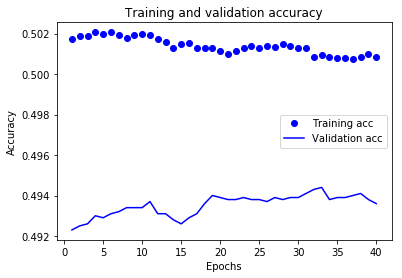

In [18]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
